# 🚢 Titanic Survival Analysis – Exploratory Data Analysis (EDA)

## 1. Introduction
- **Goal:** Explore the Titanic dataset to identify patterns in passenger survival.  
- **Dataset:** Includes passenger demographics (age, sex, class, fare) and survival outcome.  
- **Key Questions:**
  1. Did survival rates differ by gender?
  2. Did class or wealth affect survival?
  3. Did age play a role in survival?

---

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 2. Data Loading & Cleaning
### 2.1 Load Dataset
- Load `train.csv` from Titanic dataset.  
- Inspect shape, column names, and first rows.  

In [4]:
titanic_df = pd.read_csv("../titanic/train.csv")

In [10]:
print("--------------------Titanic DataFrame--------------------\n")
print(titanic_df.head())
print("\n--------------------Dataset Structure (rows, columns)--------------------\n")
print(titanic_df.shape)
print("\n--------------------Column Info--------------------\n")
print(titanic_df.info())
print("\n--------------------Statistical Summary--------------------\n")
print(titanic_df.describe().T)
print("\n--------------------Column Names--------------------\n")
print(titanic_df.columns.to_list())

--------------------Titanic DataFrame--------------------

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        

### 2.2 Handle Missing Values
- Check missing values with `.isnull().sum()`.  
- Fill Age with median, Embarked with mode.  
- Drop Cabin Column (too many missing values).  
- Update the Embarked value with actual port name

In [11]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
titanic_df.loc[titanic_df["Age"].isnull(), "Age"] = titanic_df["Age"].median()
titanic_df.loc[titanic_df["Embarked"].isnull(), "Embarked"] = titanic_df[
    "Embarked"
].mode()[0]
titanic_df["Has_Cabin"] = titanic_df["Cabin"].notnull().astype(int)
titanic_df = titanic_df.drop(["Cabin"], axis=1)

embarked_mapping = {"S": "Southampton", "C": "Cherbourg", "Q": "Queenstown"}
titanic_df["Embarked"] = titanic_df["Embarked"].map(embarked_mapping)

### 2.3 Feature Engineering
- Create new features:
  - `FamilySize = SibSp + Parch + 1`  
  - `IsAlone = 1 if FamilySize==1 else 0`  
  - `AgeGroup` by binning Age (Child, Teenage, Adult, MiddleAged, Senior).  

In [15]:
titanic_df["FamilySize"] = titanic_df["SibSp"] + titanic_df["Parch"] + 1
titanic_df["IsAlone"] = (titanic_df["FamilySize"] == 1).astype(int)
titanic_df["AgeGroup"] = pd.cut(
    titanic_df["Age"],
    bins=[0, 12, 20, 40, 60, 80],
    labels=["Child", "Teenager", "Adult", "MiddleAged", "Senior"],
)

## 3. Exploratory Data Analysis (EDA)

### 3.1 Univariate Analysis
- Distribution of Age (histogram).  
- Distribution of Fare.  
- Countplot of Passenger Class and Sex.  

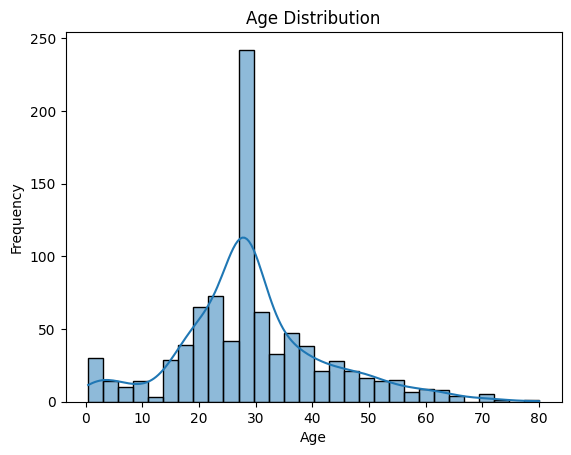

In [18]:
sns.histplot(titanic_df, x="Age", bins=30, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

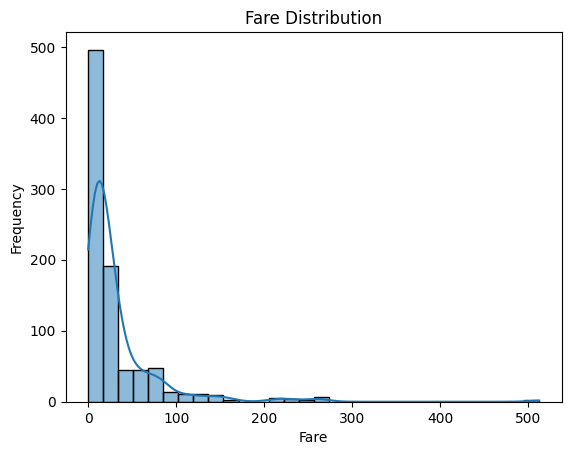

In [19]:
sns.histplot(titanic_df, x="Fare", bins=30, kde=True)
plt.title("Fare Distribution")
plt.xlabel("Fare")
plt.ylabel("Frequency")
plt.show()

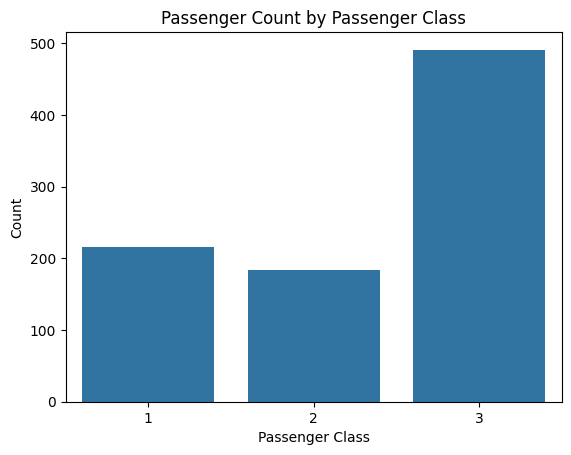

In [21]:
sns.countplot(data=titanic_df, x="Pclass")
plt.title("Passenger Count by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.show()

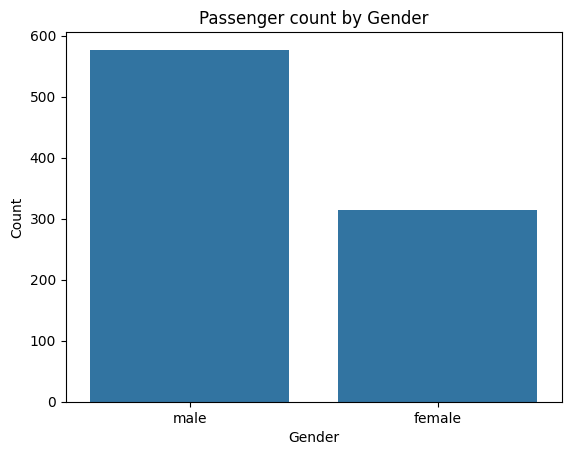

In [22]:
sns.countplot(data=titanic_df, x="Sex")
plt.title("Passenger count by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

### 3.2 Bivariate Analysis
- Survival by Gender (barplot).  
- Survival by Passenger Class (barplot).  
- Survival by AgeGroup (barplot).  


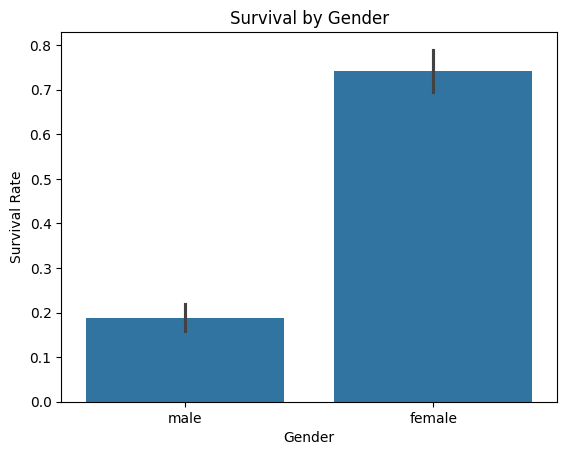

In [27]:
sns.barplot(data=titanic_df, x="Sex", y="Survived")
plt.title("Survival by Gender")
plt.xlabel("Gender")
plt.ylabel("Survival Rate")
plt.show()

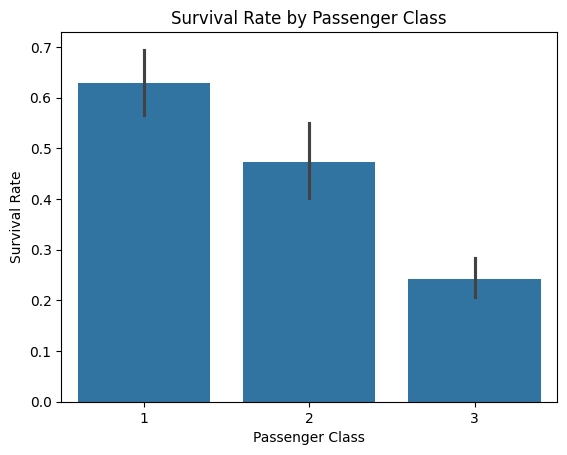

In [28]:
sns.barplot(data=titanic_df, x="Pclass", y="Survived")
plt.title("Survival Rate by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate")
plt.show()

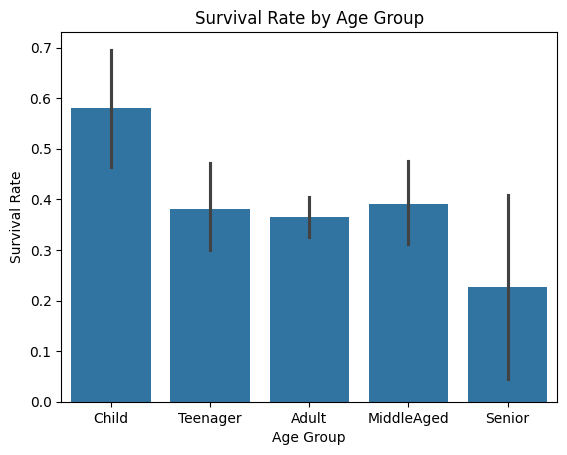

In [29]:
sns.barplot(data=titanic_df, x="AgeGroup", y="Survived")
plt.title("Survival Rate by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Survival Rate")
plt.show()

### 3.3 Multivariate Analysis
- Heatmap of correlations between numerical features.  
- Pairplot to explore Age, Fare, and Survival.  


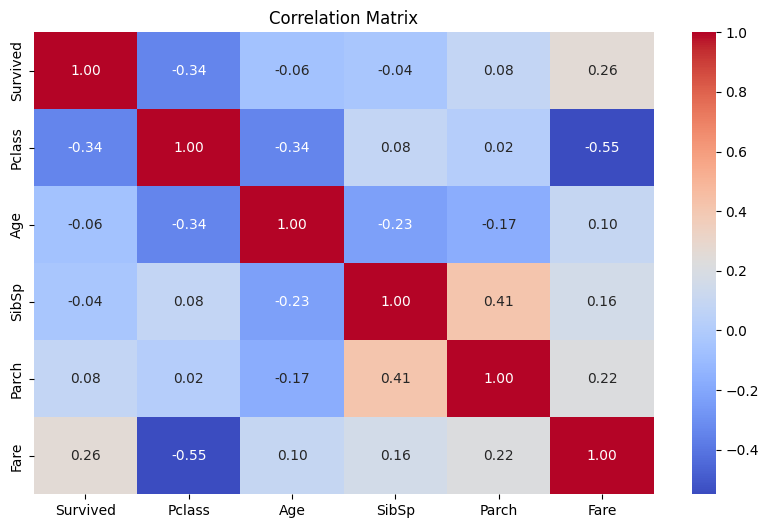

In [40]:
titanic_numeric_data_matrix = titanic_df[
    ["Survived", "Pclass", "Age", "SibSp", "Parch", "Fare"]
].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(titanic_numeric_data_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

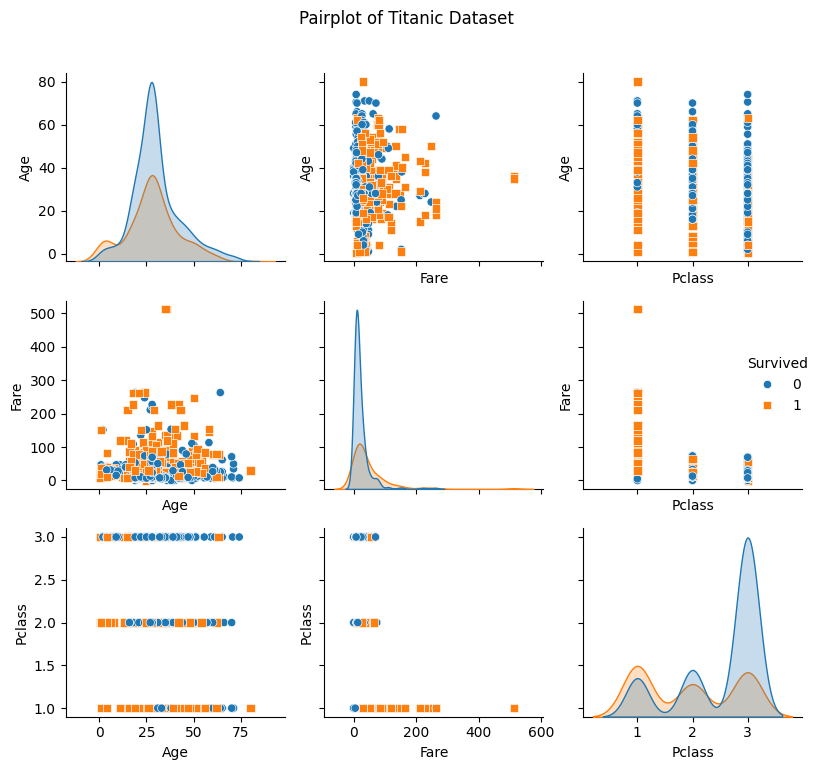

In [41]:
p = sns.pairplot(
    data=titanic_df,
    hue="Survived",
    diag_kind="kde",
    markers=["o", "s"],
    vars=["Age", "Fare", "Pclass"],
)

for ax in p.axes.flat:
    ax.set_xlabel(ax.get_xlabel(), visible=True)
    ax.set_ylabel(ax.get_ylabel(), visible=True)

plt.suptitle("Pairplot of Titanic Dataset", y=1.02)
plt.tight_layout()
plt.show()

## 4. Insights
- Summarize **key findings**:
  1. Women had higher survival rates than men.  
  2. Higher-class passengers had higher survival rates.  
  3. Children were more likely to survive than adults.  
  4. Fare correlates with survival (wealthier passengers survived more).  

---
